In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

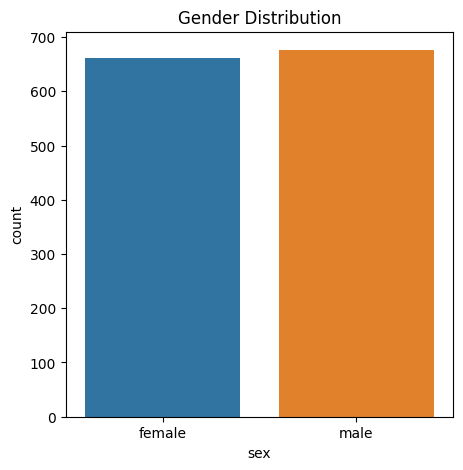

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

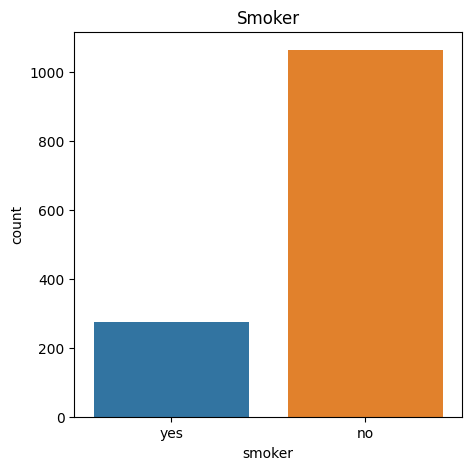

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

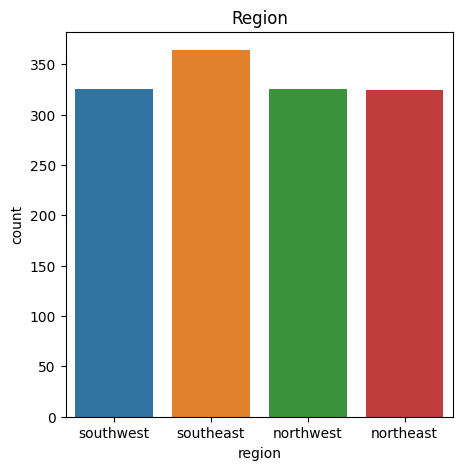

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

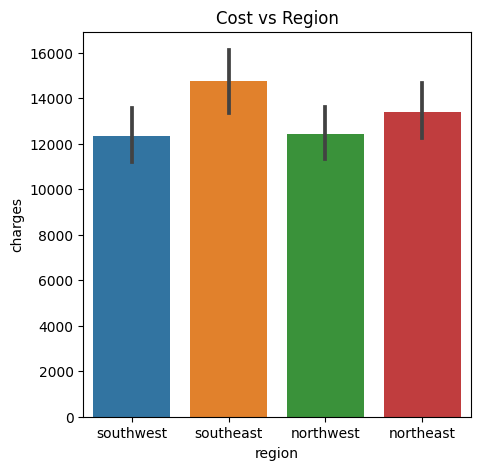

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

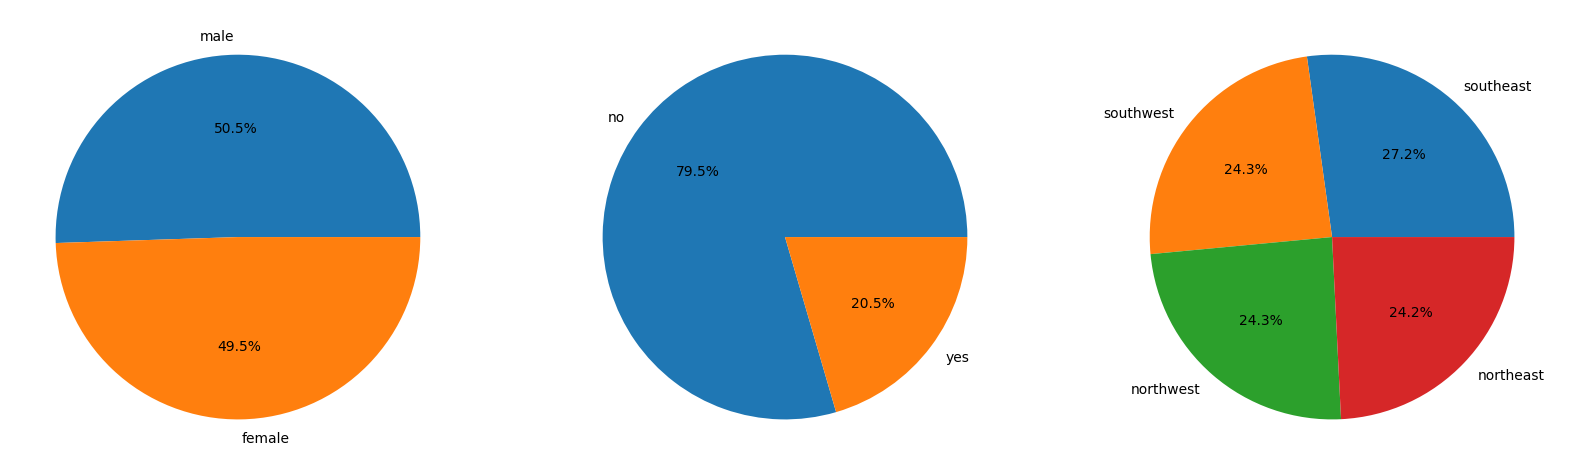

In [10]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)
	x = df[col].value_counts()
	plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

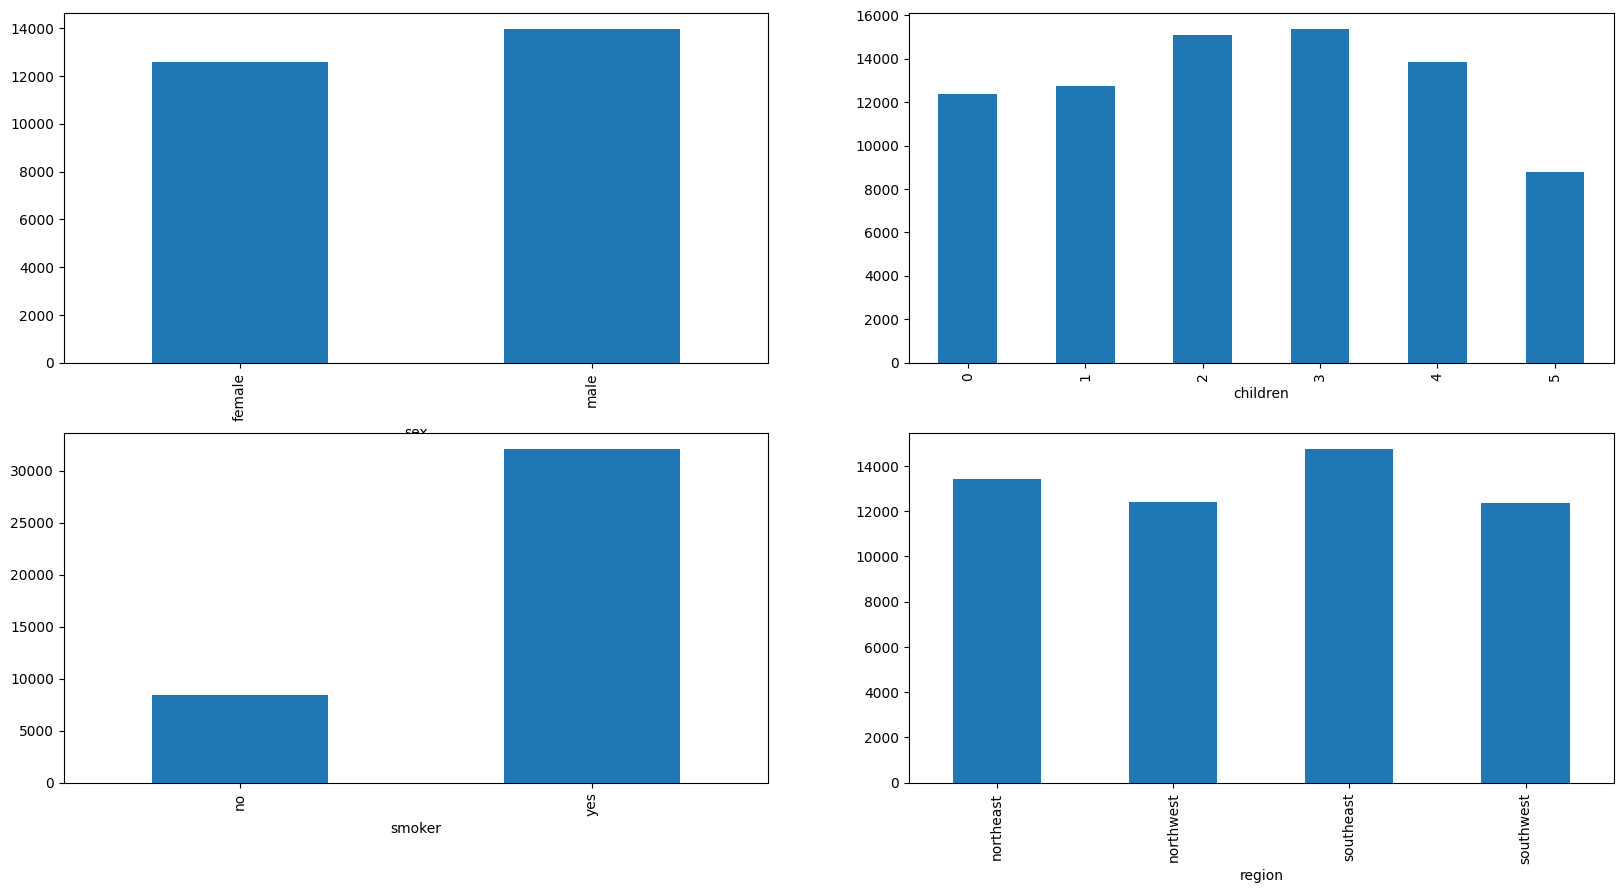

In [11]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

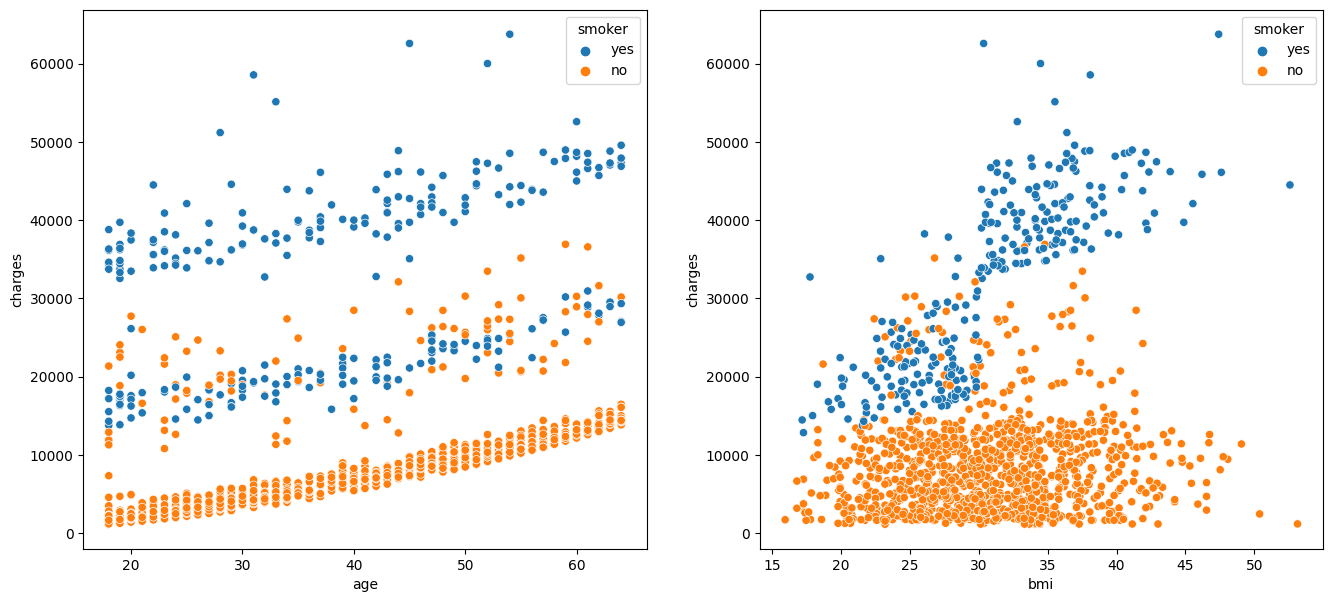

In [12]:
import seaborn as sns

features = ['age', 'bmi']
plt.subplots(figsize=(16, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,y='charges',hue='smoker')
plt.show()

<Axes: >

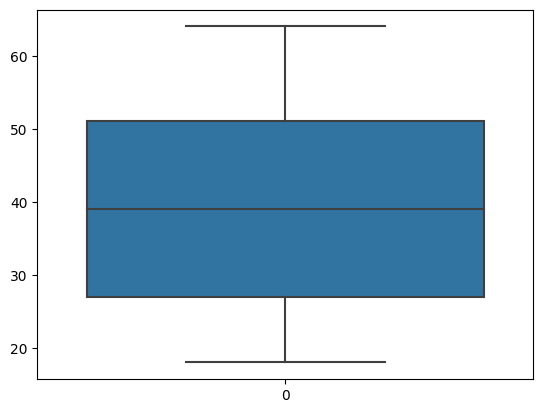

In [13]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: >

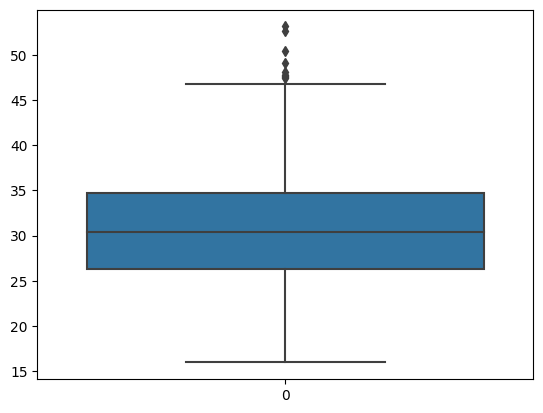

In [14]:
sns.boxplot(df['bmi'])

In [15]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)

iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: >

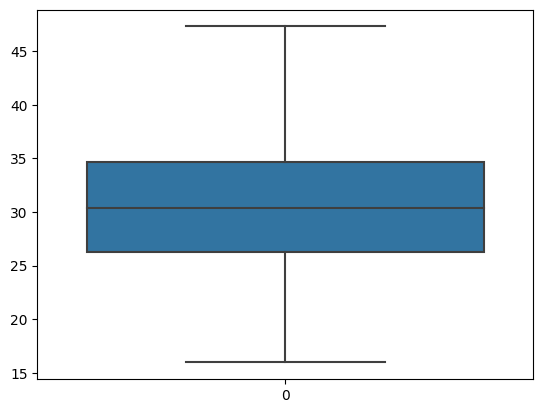

In [16]:
# Calculate quantiles and IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers using clip
df['bmi'] = df['bmi'].clip(lower_bound, upper_bound)

# Visualize the distribution using boxplot
sns.boxplot(df['bmi'])

In [17]:
df['bmi'].skew()
df['age'].skew()

0.054780773126998195

In [18]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

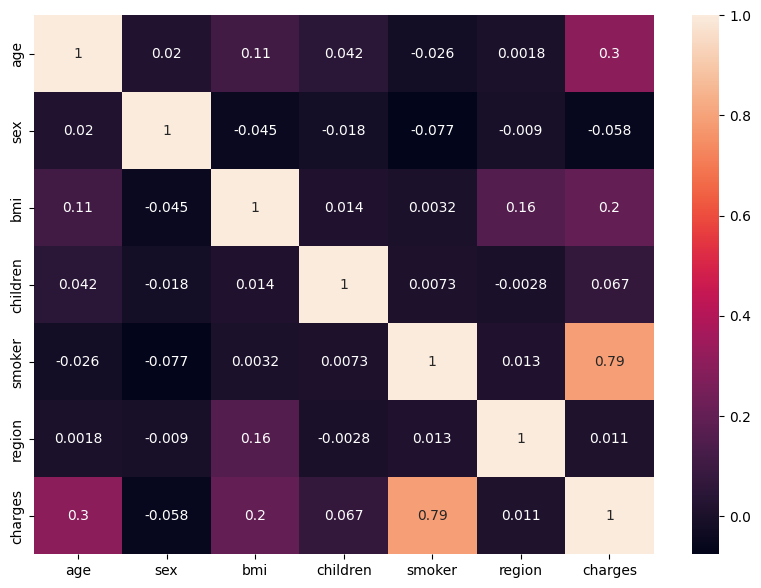

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X=df.drop(['charges'],axis=1)
Y=df[['charges']]

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models and hyperparameters for GridSearchCV
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XG Boosting": XGBRegressor(random_state=42, use_label_encoder=False, eval_metric="rmse")
}

# Define hyperparameter grids for GridSearchCV
param_grids = {
    "Linear Regression": {},
    "Decision Tree": {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    "XG Boosting": {
        'n_estimators': [75, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Train and evaluate models using GridSearchCV
results = []
for name, model in models.items():
    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='r2', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Evaluate model
    y_pred = best_model.predict(X_test)
    acc = best_model.score(X_test, y_test)  # R2 score
    cv = cross_val_score(best_model, X, Y, cv=5).mean()
    
    # Append results
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Test Accuracy (R2)": f"{acc * 100:.2f}",
        "Cross Validation Score (R2)": f"{cv * 100:.2f}"
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [22]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(max_depth= 3,min_samples_split = 5),
#     "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42),
#     "XG Boosting": XGBRegressor(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric="rmse")
# }

# # Train and evaluate models
# results = []
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = model.score(X_test,y_test)
#     cv = cross_val_score(model,X,Y,cv=5,).mean()
#     results.append({"Model": name, 
#                     "Accuracy": f"{acc * 100:.2f}", #r2-score
#                     "Cross Validation Score" : f"{cv*100:.2f}",})

# # Display results in a DataFrame
# results_df = pd.DataFrame(results)
# print(results_df.sort_values(by = 'Accuracy', ascending = False))

In [23]:
results_df.head()

,Model,Best Parameters,Test Accuracy (R2),Cross Validation Score (R2)
0,Linear Regression,{},80.62,74.71
1,Decision Tree,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",89.30,84.16
2,Random Forest,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",90.37,86.08
3,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",90.16,86.07
4,XG Boosting,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",90.02,86.03


In [24]:
for i in range(5):
    print(results_df['Model'][i],results_df['Best Parameters'][i])    

Linear Regression {}
Decision Tree {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Random Forest {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Gradient Boosting {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
XG Boosting {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75, 'subsample': 1.0}


In [25]:
feats=pd.DataFrame(data=grid_search.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])

feats

,Importance
age,0.039294
sex,0.003301
bmi,0.064575
children,0.010593
smoker,0.872088
region,0.010148


In [26]:
important_features=feats[feats['Importance']>0.01]

important_features

,Importance
age,0.039294
bmi,0.064575
children,0.010593
smoker,0.872088
region,0.010148


In [27]:
df.drop(df[['sex']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=RandomForestRegressor(n_estimators=150,max_depth=5,min_samples_leaf = 4, min_samples_split= 10)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(f"Training Accuracy : ",r2_score(ytrain,ypredtrain4))
print(f"Test Accuracy : ",r2_score(ytest,ypredtest4))

Training Accuracy :  0.8748093083531407
Test Accuracy :  0.9040826766867813


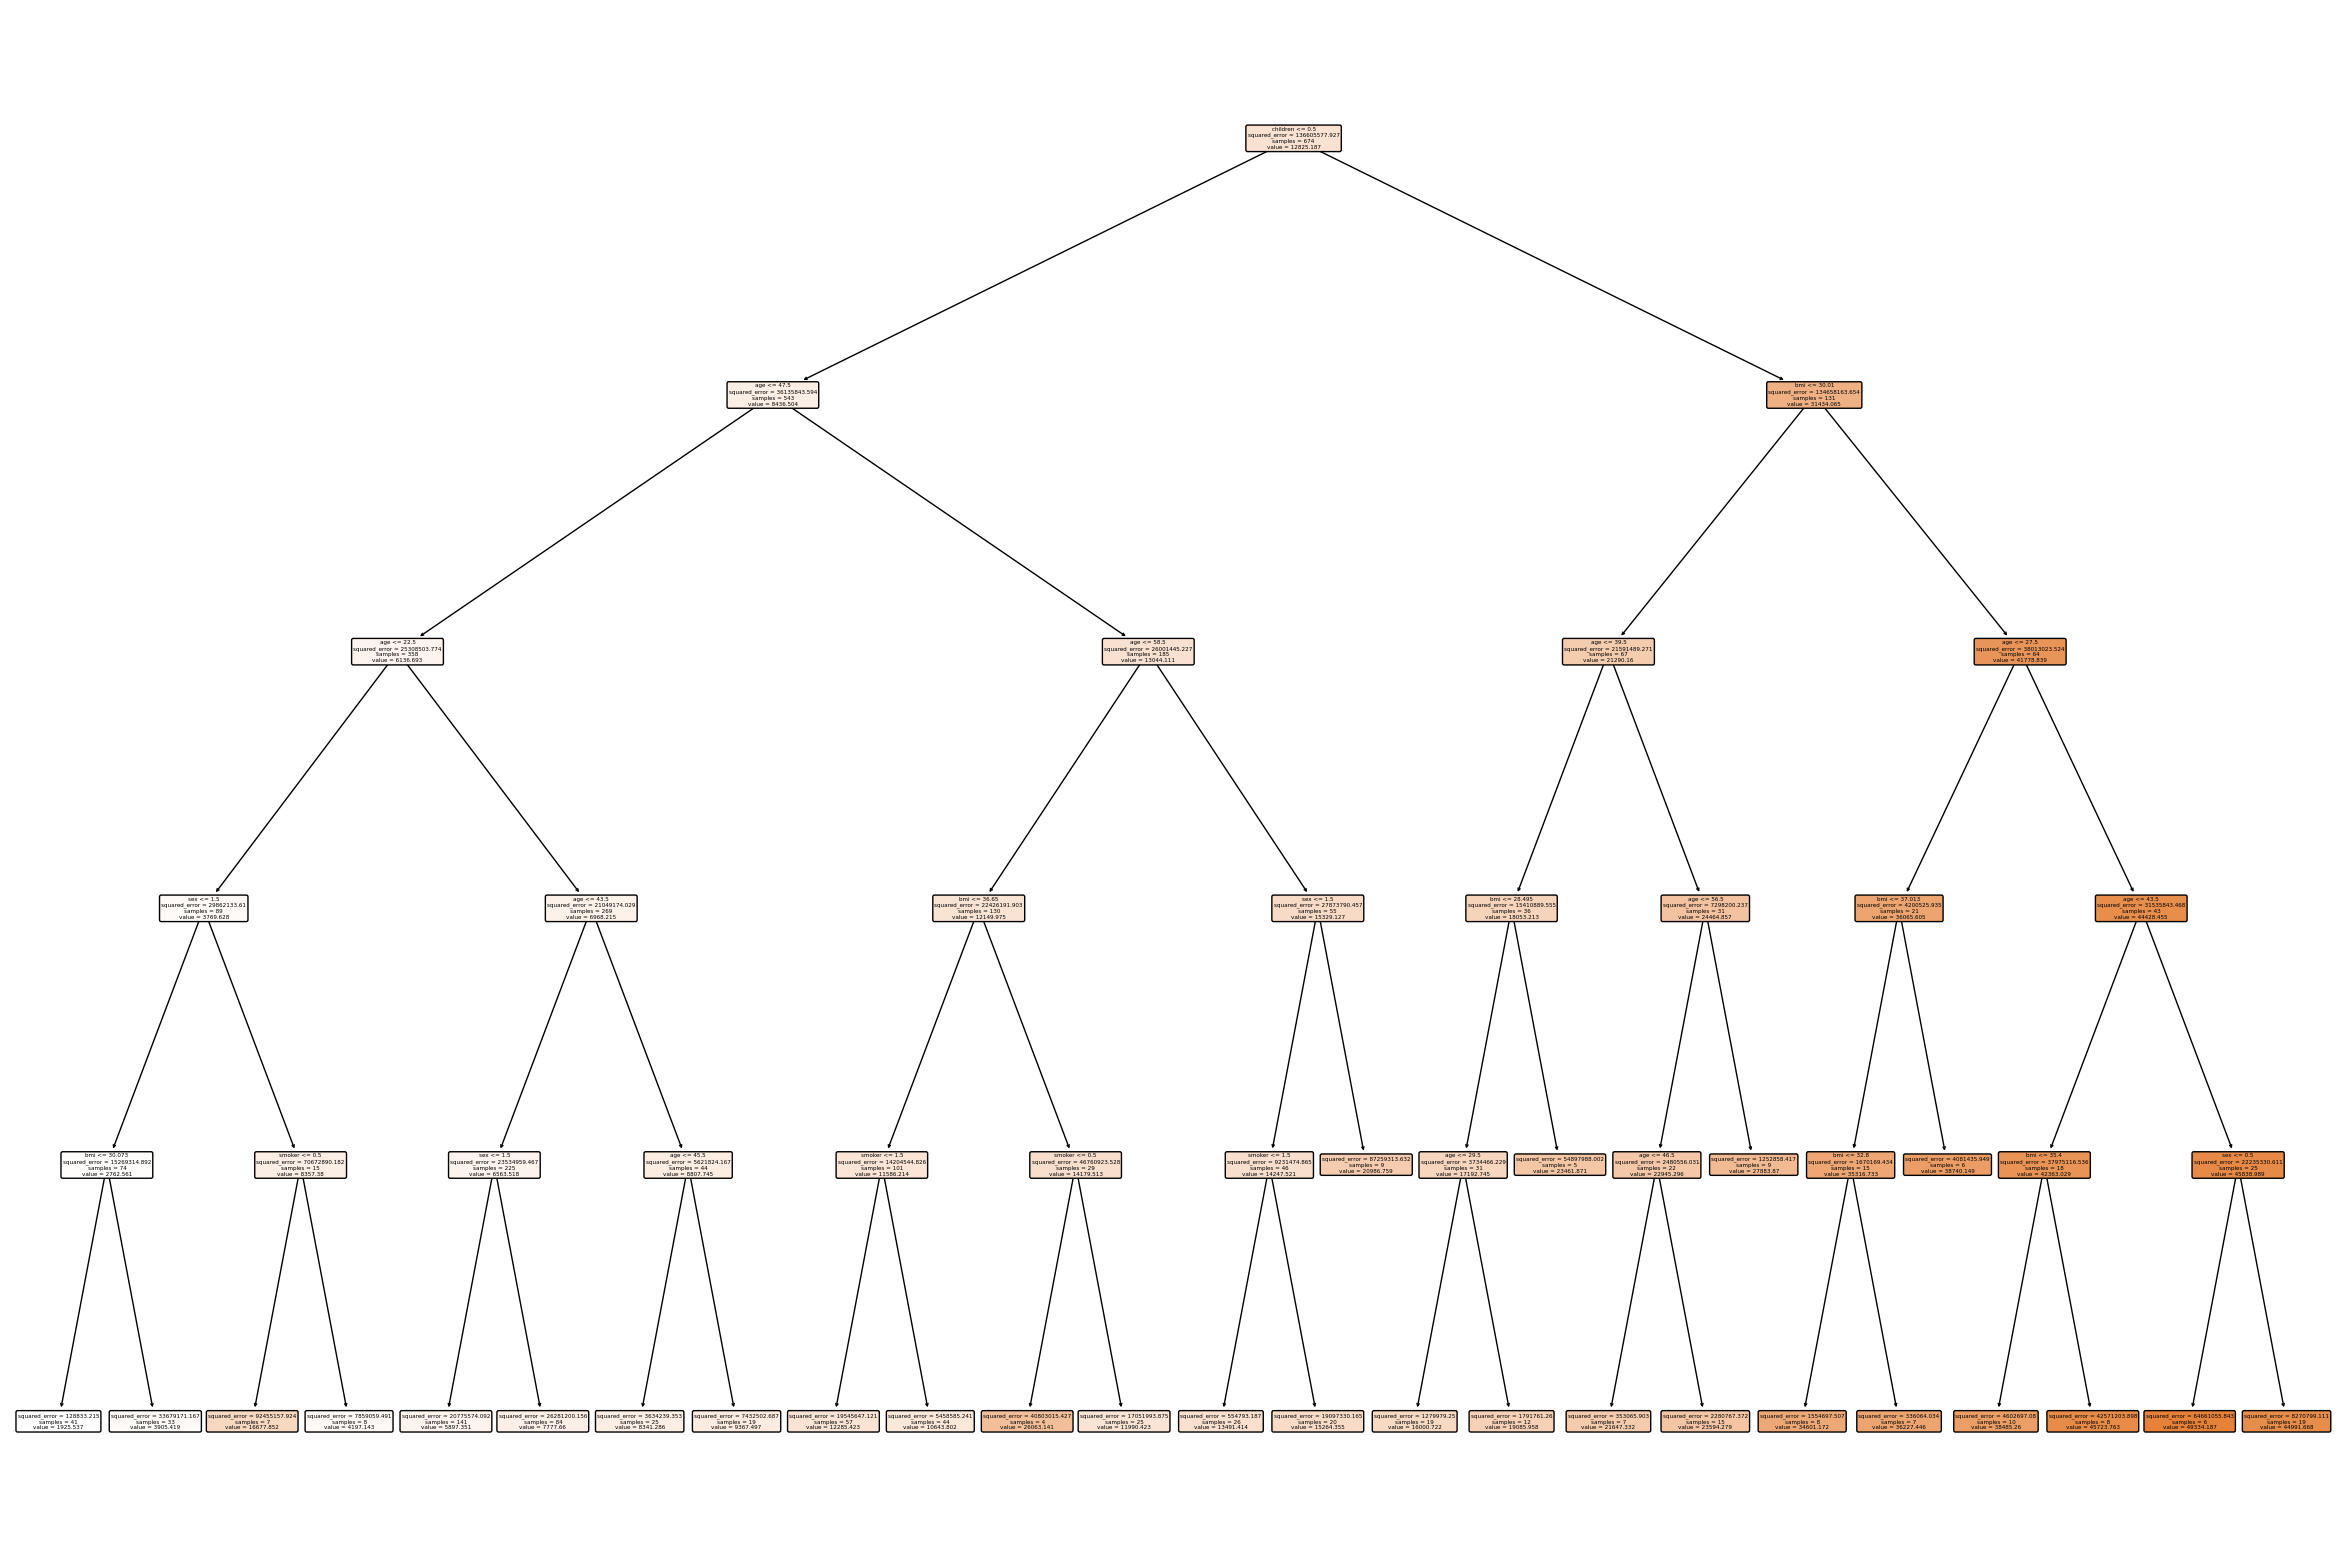

In [28]:
from sklearn.tree import plot_tree
tree = finalmodel.estimators_[0]  # Extract the first decision tree

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(tree, filled=True, feature_names=['age','bmi','sex','children','smoker','region'], class_names=['charges'], rounded=True)
plt.show()

In [29]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])

new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
# new_data['sex']=new_data['sex'].map({'male':0,'female':1})
new_data.drop(new_data[['sex']],axis=1,inplace=True)
new_data['region']=new_data['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
finalmodel.predict(new_data)

array([17751.43156647])

In [30]:
# from pickle import dump

# dump(finalmodel,open('insurancemodelf.pkl','wb'))

In [31]:
# import joblib
# # After training your model:
# joblib.dump(finalmodel, 'model2.pkl')

In [32]:
# import sklearn
# print(sklearn.__version__)

In [33]:
# pip install scikit-learn==1.5.2